In [127]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [45]:
fullname = "selected_models/04.12.2020_12.27/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [46]:
models.all_memberships

{0: array([6.80413690e-01, 0.00000000e+00, 1.74054291e-01, 6.55504339e-01,
        2.97633601e-01, 2.24692760e-02, 2.00031683e-01, 8.45741898e-01,
        8.54338087e-01, 0.00000000e+00, 0.00000000e+00, 9.66455146e-01,
        2.99383143e-01, 0.00000000e+00, 2.44488121e-01, 1.00000000e+00,
        7.20933541e-01, 1.00000000e+00, 0.00000000e+00, 2.05959028e-01,
        6.10252459e-02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        5.37805778e-01, 6.48753012e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.57756352e-01,
        0.00000000e+00, 6.40450085e-01, 4.46293419e-01, 0.00000000e+00,
        3.89626233e-01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.26072786e-01, 4.07148918e-01,
        8.65785361e-01, 6.84366930e-01, 4.96949238e-01, 3.64116679e-01,
        0.00000000e+00, 0.00000000e+00, 4.95987829e-01, 0.00000000e+00,
        2.15543919e-04, 2.28125503e-01, 1.33440526e-01, 7.454

In [47]:
models.all_labels

{0: array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]),
 1: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1]),
 2: array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 

In [48]:
models.folds

{'x train 0': array([[ 0.07589439, -0.21910557,  0.8060875 , ..., -0.7119496 ,
         -0.6499323 , -2.1915007 ],
        [-0.11181752, -0.24002978,  0.9893177 , ..., -0.5851634 ,
         -0.77287585, -2.1071646 ],
        [ 0.14849725, -0.14739339,  0.9075504 , ..., -0.5491797 ,
         -0.3200431 , -2.2319224 ],
        ...,
        [-0.13290721, -0.16287413,  0.9775266 , ..., -0.6790531 ,
         -0.8314287 , -2.1313143 ],
        [ 0.03962243, -0.3220379 ,  0.9071696 , ..., -0.5314974 ,
         -0.60306084, -2.2264125 ],
        [ 0.09387444, -0.46786755,  1.2250688 , ..., -0.59407395,
         -0.53081673, -2.3478394 ]]),
 'y train 0': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0

In [49]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)

In [50]:
memberships[0:10]

[0.6804136902880145,
 0.0,
 0.1740542907381245,
 0.6555043394606102,
 0.29763360099882796,
 0.022469275992491045,
 0.20003168347753475,
 0.8457418981403291,
 0.8543380871825262,
 0.0]

In [51]:
predictions = [1 if x >= 0.5 else 0 for x in memberships]

In [52]:
predictions[0:10]

[1, 0, 0, 1, 0, 0, 0, 1, 1, 0]

In [53]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)

In [54]:
labels[0:10]

[0, 0, 0, 1, 0, 0, 1, 1, 1, 0]

In [55]:
len(predictions), len(labels), len(memberships)

(500, 500, 500)

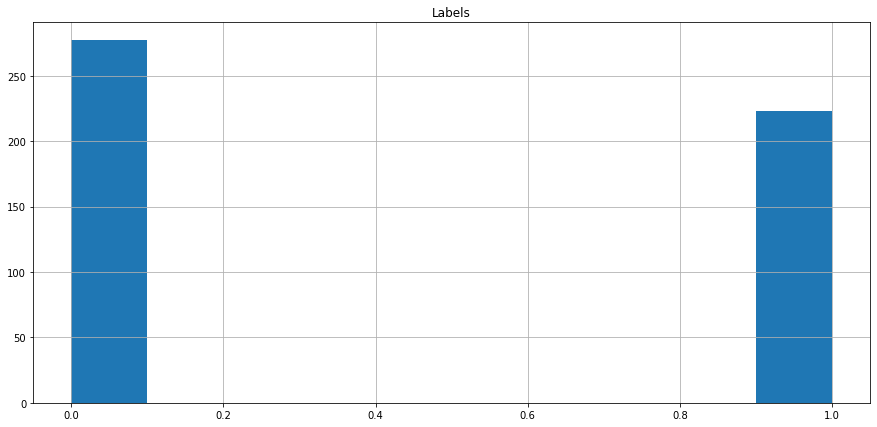

In [56]:
plt.figure(figsize=(15, 7))
plt.hist(labels)
plt.grid()
plt.title("Labels")
plt.show()

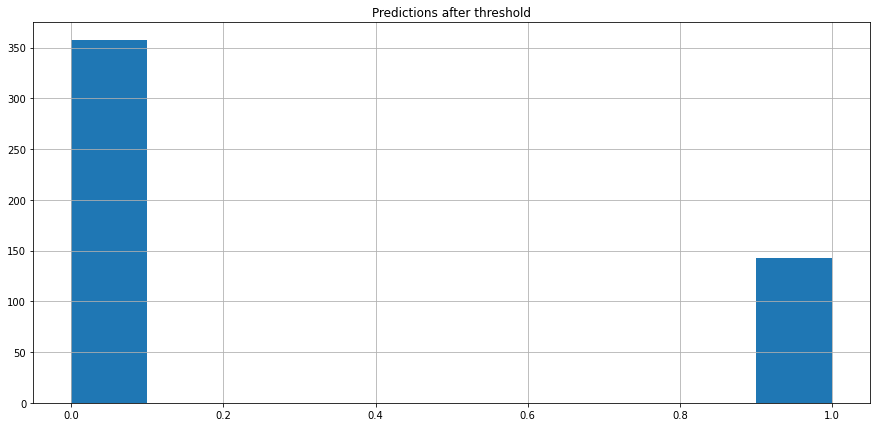

In [57]:
plt.figure(figsize=(15, 7))
plt.hist(predictions)
plt.grid()
plt.title("Predictions after threshold")
plt.show()

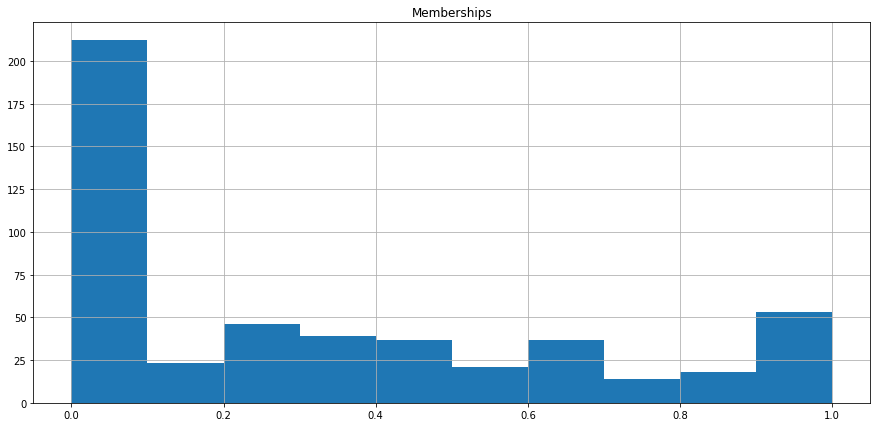

In [58]:
plt.figure(figsize=(15, 7))
plt.hist(memberships)
plt.grid()
plt.title("Memberships")
plt.show()

In [59]:
data[data["Outcome"] == "TP"].head(10)

,Outcome,Label,Prediction,Membership
3,TP,1,1,0.655504
7,TP,1,1,0.845742
8,TP,1,1,0.854338
11,TP,1,1,0.966455
16,TP,1,1,0.720934
17,TP,1,1,1.000000
22,TP,1,1,1.000000
24,TP,1,1,0.537806
33,TP,1,1,0.640450
45,TP,1,1,0.684367


In [60]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
0,FP,0,1,0.680414
15,FP,0,1,1.000000
23,FP,0,1,1.000000
25,FP,0,1,0.648753
37,FP,0,1,1.000000
42,FP,0,1,0.626073
44,FP,0,1,0.865785
70,FP,0,1,1.000000
88,FP,0,1,1.000000
110,FP,0,1,0.788929


In [61]:
data[data["Outcome"] == "FP"].head(10)

,Outcome,Label,Prediction,Membership
0,FP,0,1,0.680414
15,FP,0,1,1.000000
23,FP,0,1,1.000000
25,FP,0,1,0.648753
37,FP,0,1,1.000000
42,FP,0,1,0.626073
44,FP,0,1,0.865785
70,FP,0,1,1.000000
88,FP,0,1,1.000000
110,FP,0,1,0.788929


In [62]:
data[data["Outcome"] == "FN"].head(10)

,Outcome,Label,Prediction,Membership
6,FN,1,0,0.200032
12,FN,1,0,0.299383
21,FN,1,0,0.000000
27,FN,1,0,0.000000
31,FN,1,0,0.457756
35,FN,1,0,0.000000
36,FN,1,0,0.389626
41,FN,1,0,0.000000
46,FN,1,0,0.496949
48,FN,1,0,0.000000


In [63]:
tp = data[data["Outcome"] == "TP"]["Membership"]
fp = data[data["Outcome"] == "FP"]["Membership"]
tn = data[data["Outcome"] == "TN"]["Membership"]
fn = data[data["Outcome"] == "FN"]["Membership"]

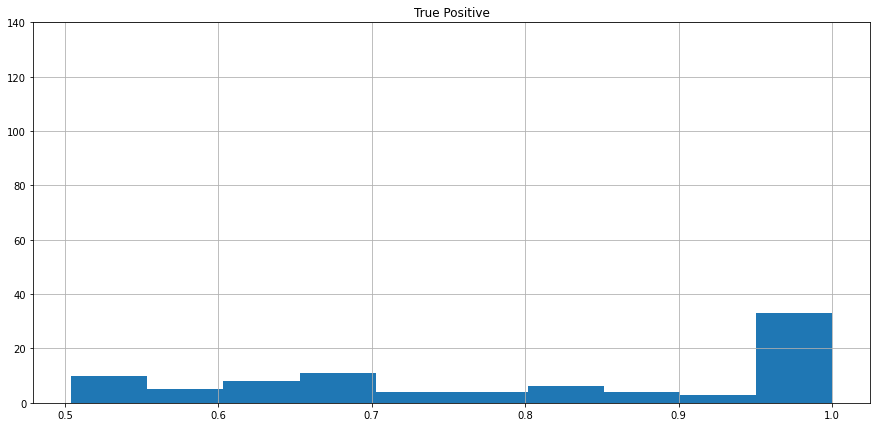

In [64]:
plt.figure(figsize=(15, 7))
plt.hist(tp)
plt.ylim(0,140)
plt.grid()
plt.title("True Positive")
plt.show()

In [65]:
data = pd.DataFrame(columns = ["Outcome", "Label", "Prediction", "Membership"])

print("Outcome", "Label", "Prediction", "Membership")

for lab, pred, memb in zip(labels, predictions, memberships):
    if pred == 1:
        if lab == pred:
            data = data.append({
                "Outcome": "TP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TP", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FP", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FP", "\t", lab, "\t", pred, "\t", memb)
    else:
        if lab == pred:
            data = data.append({
                "Outcome": "TN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("TN", "\t", lab, "\t", pred, "\t", memb)
        else:
            data = data.append({
                "Outcome": "FN", "Label": lab, "Prediction": pred, "Membership": memb
            }, ignore_index=True)
            print("FN", "\t", lab, "\t", pred, "\t", memb)

Outcome Label Prediction Membership
FP 	 0 	 1 	 0.6804136902880145
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.1740542907381245
TP 	 1 	 1 	 0.6555043394606102
TN 	 0 	 0 	 0.29763360099882796
TN 	 0 	 0 	 0.022469275992491045
FN 	 1 	 0 	 0.20003168347753475
TP 	 1 	 1 	 0.8457418981403291
TP 	 1 	 1 	 0.8543380871825262
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.966455145687762
FN 	 1 	 0 	 0.2993831434886778
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.24448812126828512
FP 	 0 	 1 	 1.0
TP 	 1 	 1 	 0.7209335408974722
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.2059590276345259
TN 	 0 	 0 	 0.0610252458666537
FN 	 1 	 0 	 0.0
TP 	 1 	 1 	 1.0
FP 	 0 	 1 	 1.0
TP 	 1 	 1 	 0.5378057784011456
FP 	 0 	 1 	 0.6487530120949581
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.45775635245957136
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.6404500847962522
TN 	 0 	 0 	 0.446293418557403
FN 	 1 	 0 	 0.0
FN 	 1 	 0 	 0.3896262330586816
FP 	 0 	 1 	 1.0
TN 	 0 	 0 	 0

TP 	 1 	 1 	 0.7287482560660845
TN 	 0 	 0 	 0.2389188440695118
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
TP 	 1 	 1 	 0.6916364426737577
TP 	 1 	 1 	 0.6581071262083
TP 	 1 	 1 	 0.8220905975042117
FP 	 0 	 1 	 0.8365820921164727
FN 	 1 	 0 	 0.41746019705701776
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.38886234003871856
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.17611897281708433
TP 	 1 	 1 	 1.0
TN 	 0 	 0 	 0.0
TP 	 1 	 1 	 0.8568485140094266
TP 	 1 	 1 	 0.7857307794254527
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.2873270056746725
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.40729634313282537
TP 	 1 	 1 	 0.6760972379637991
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.14321515841702281
TN 	 0 	 0 	 0.23402989306729693
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
TN 	 0 	 0 	 0.0
FN 	 1 	 0 	 0.32464161708329187
FP 	 0 	 1 	 0.9322598888494691
TN 	 0 	 0 	 0.49103923457321597
TP 	 1 	 1 	 1.0
FN 	 1 	 0 	 0.0
TN 	 0 	 0 	 

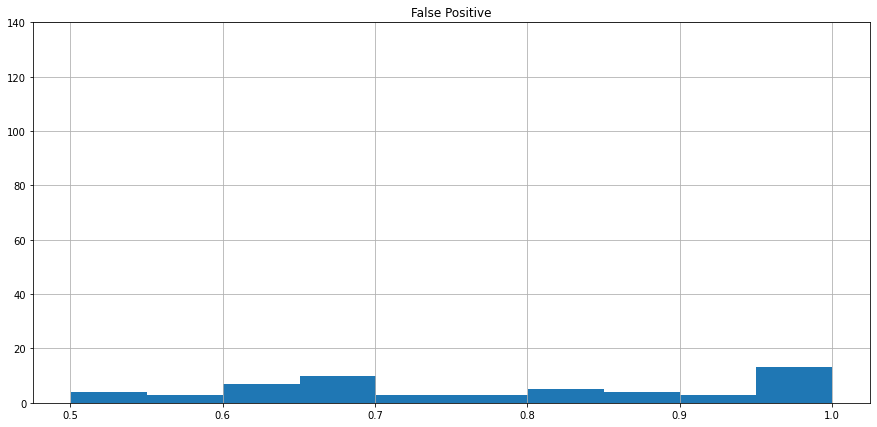

In [66]:
plt.figure(figsize=(15, 7))
plt.hist(fp)
plt.ylim(0,140)
plt.grid()
plt.title("False Positive")
plt.show()

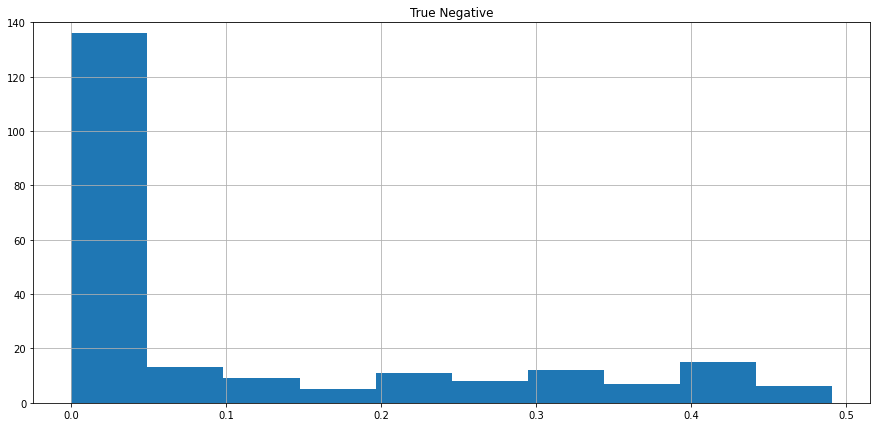

In [67]:
plt.figure(figsize=(15, 7))
plt.hist(tn)
plt.ylim(0,140)
plt.grid()
plt.title("True Negative")
plt.show()

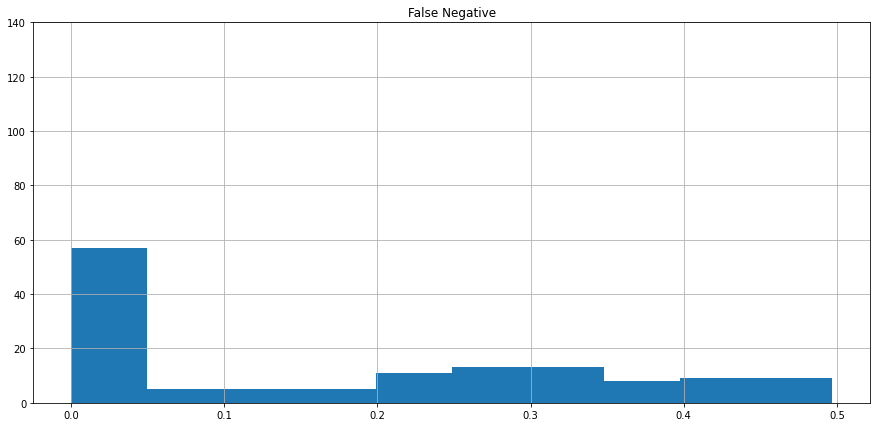

In [68]:
plt.figure(figsize=(15, 7))
plt.hist(fn)
plt.ylim(0,140)
plt.grid()
plt.title("False Negative")
plt.show()

Over 500 news

In [69]:
confusion = pd.DataFrame(confusion_matrix(labels, predictions), 
             index=["Classified fake", "Classified not fake"], 
             columns=["Actually fake", "Actually not fake"])
confusion

,Actually fake,Actually not fake
Classified fake,222,55
Classified not fake,135,88


In [70]:
print("TP: ", len(tp))
print("FP: ", len(fp))
print("TN: ", len(tn))
print("FN: ", len(fn))

TP:  88
FP:  55
TN:  222
FN:  135


In [71]:
len(tp)+len(fp)+len(tn)+len(fn)

500

In [140]:
len(tp) + len(tn), len(fp) + len(fn)

(310, 190)

In [72]:
tp_string = data[data["Outcome"] == "TP"]["Outcome"].values
fp_string = data[data["Outcome"] == "FP"]["Outcome"].values
tn_string = data[data["Outcome"] == "TN"]["Outcome"].values
fn_string = data[data["Outcome"] == "FN"]["Outcome"].values

In [73]:
all_cases = []

for i in tp_string:
    all_cases.append(i)
    
for i in fp_string:
    all_cases.append(i)
    
for i in tn_string:
    all_cases.append(i)
    
for i in fn_string:
    all_cases.append(i)

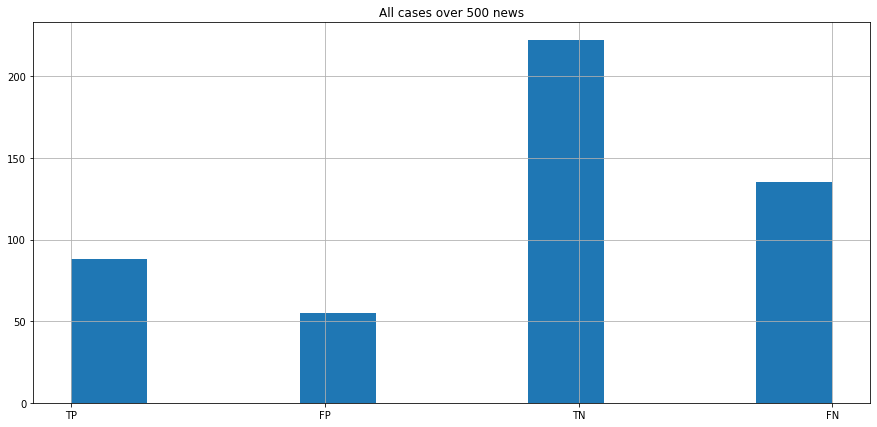

In [74]:
plt.figure(figsize=(15, 7))
plt.hist(all_cases)
plt.grid()
plt.title("All cases over 500 news")
plt.show()

In [75]:
tp.describe(), fp.describe(), tn.describe(), fn.describe()

(count    88.000000
 mean      0.804829
 std       0.178286
 min       0.504137
 25%       0.651267
 50%       0.826183
 75%       1.000000
 max       1.000000
 Name: Membership, dtype: float64,
 count    55.000000
 mean      0.777919
 std       0.160725
 min       0.500602
 25%       0.651204
 50%       0.756584
 75%       0.929937
 max       1.000000
 Name: Membership, dtype: float64,
 count    222.000000
 mean       0.105151
 std        0.154298
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.217261
 max        0.491039
 Name: Membership, dtype: float64,
 count    135.000000
 mean       0.172628
 std        0.168860
 min        0.000000
 25%        0.000000
 50%        0.158186
 75%        0.324737
 max        0.496949
 Name: Membership, dtype: float64)

In [114]:
accuracy_score(labels, predictions)

0.62

In [125]:
(len(tp) + len(tn)) / 500

0.62

In [121]:
tree = DecisionTreeClassifier()
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
SVM = svm.LinearSVC()
tree_scores = []
NN_scores = []
SVM_scores = []

for i in range(0,5):
    X_train = models.folds['x train '+str(i)]
    y_train = models.folds['y train '+str(i)]
    X_test = models.folds['x test '+str(i)]
    y_test = models.folds['y test '+str(i)]
    
    tree.fit(X_train, y_train)
    NN.fit(X_train, y_train)
    SVM.fit(X_train, y_train)
    
    tree_scores.append(tree.score(X_test, y_test))
    NN_scores.append(NN.score(X_test, y_test))
    SVM_scores.append(SVM.score(X_test, y_test))
    
print("Tree classifier: ", np.mean(tree_scores))
print("Neural network: ", np.mean(NN_scores))
print("Support vector machine: ", np.mean(SVM_scores))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

Tree classifier:  0.71
Neural network:  0.868
Support vector machine:  0.8959999999999999


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Learning Curve

In [137]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.01, 1.0, 10)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

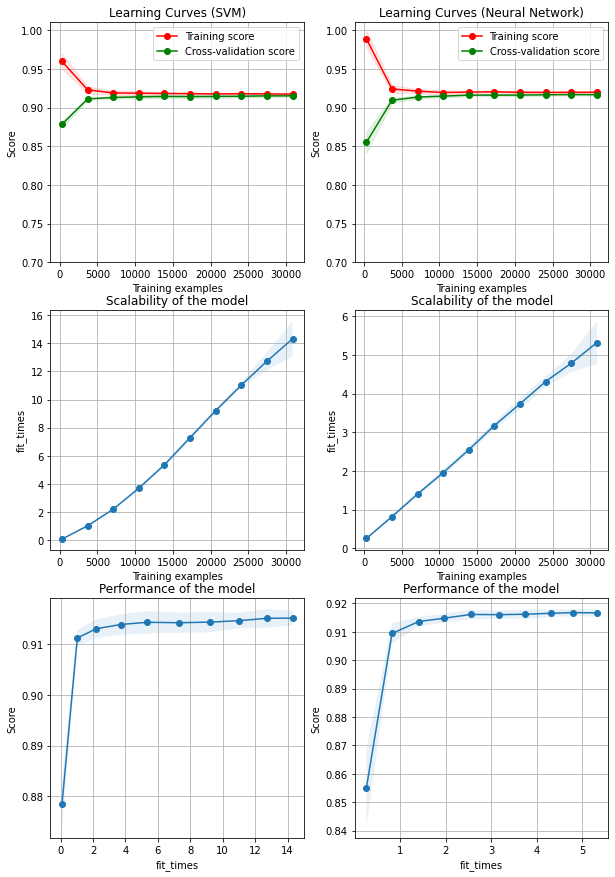

In [138]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

PATH_TEXTS = "preprocessed_datasets/text/23.11.2020_02.22/final_text_dataset_38592.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

def simple_split(dataset):
    X = dataset.iloc[:, 0].values  # x-component
    y = dataset.iloc[:, 1].values  # labels
    return X, y

X, y = simple_split(dataset)
X = [ast.literal_eval(i) for i in X]  # this is needed to parse strings
X = np.array(X)

#title = "Learning Curves (Tree Classifier)"
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = DecisionTreeClassifier()
#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
#                    cv=cv, n_jobs=4)

title = "Learning Curves (Neural Network)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (SVM)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm.LinearSVC()
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()